In [25]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [26]:
record_dtype = np.dtype({'names': ['date', 'file', '?1', '?2', 'filter', 'sn', '?3', 'mag', 'magerr', '?4', 'MJD'],
                         'formats': ['U10', 'U36', 'U6', 'U4', 'U2', 'U8', int, float, float, int, float]})
sn_curves = np.loadtxt('sn_inst_data.txt', dtype=record_dtype)

field_dtype = np.dtype({'names': ['date', 'file', '?1', '?2', 'camera', 'filter', 'sn', 'field_number', 'mag', 'magerr', '?4'],
                         'formats': ['U10', 'U36', 'U6', 'U4', 'U4', 'U2', 'U8', int, float, float, float]})
field_obs = np.loadtxt('inst_output.txt', dtype=field_dtype)

field_apass_dtype = np.dtype({'names': ['APASS', 'field_number',  'filter', 'mag', 'magerr'],
                         'formats': ['U5', int, 'U2', float, float]})
field_apass = np.loadtxt('standards.txt', dtype=field_apass_dtype)

In [27]:
corrected = []
c = 0
for observation in sn_curves:
    date = observation['date']
    filter = observation['filter']
    mag = observation['mag']
    file = observation['file']
    
    frame_fields = field_obs[field_obs['file'] == file]

    diffs = []
    for field in frame_fields:
        apass_row = field_apass[np.logical_and(field_apass['field_number'] == field['field_number'], field_apass['filter']==filter)]
        if len(apass_row) > 0:
            off = apass_row['mag'] - observation['mag']
            diffs += [off[0]]
        else:
            diffs = [0]
    diff = np.mean(diffs)
    corrected += [mag + diff]


In [28]:
corr_record_dtype = np.dtype({'names': ['date', 'file', '?1', '?2', 'filter', 'sn', '?3', 'mag', 'magerr', '?4', 'MJD', 'corrected'],
                         'formats': ['U10', 'U36', 'U6', 'U4', 'U2', 'U8', int, float, float, int, float, float]})
corr_sn_curves = np.zeros(sn_curves.shape, dtype=corr_record_dtype)

for col in ['date', 'file', '?1', '?2', 'filter', 'sn', '?3', 'mag', 'magerr', '?4', 'MJD']:
    corr_sn_curves[col] = sn_curves[col]
    corr_sn_curves['corrected'] = corrected

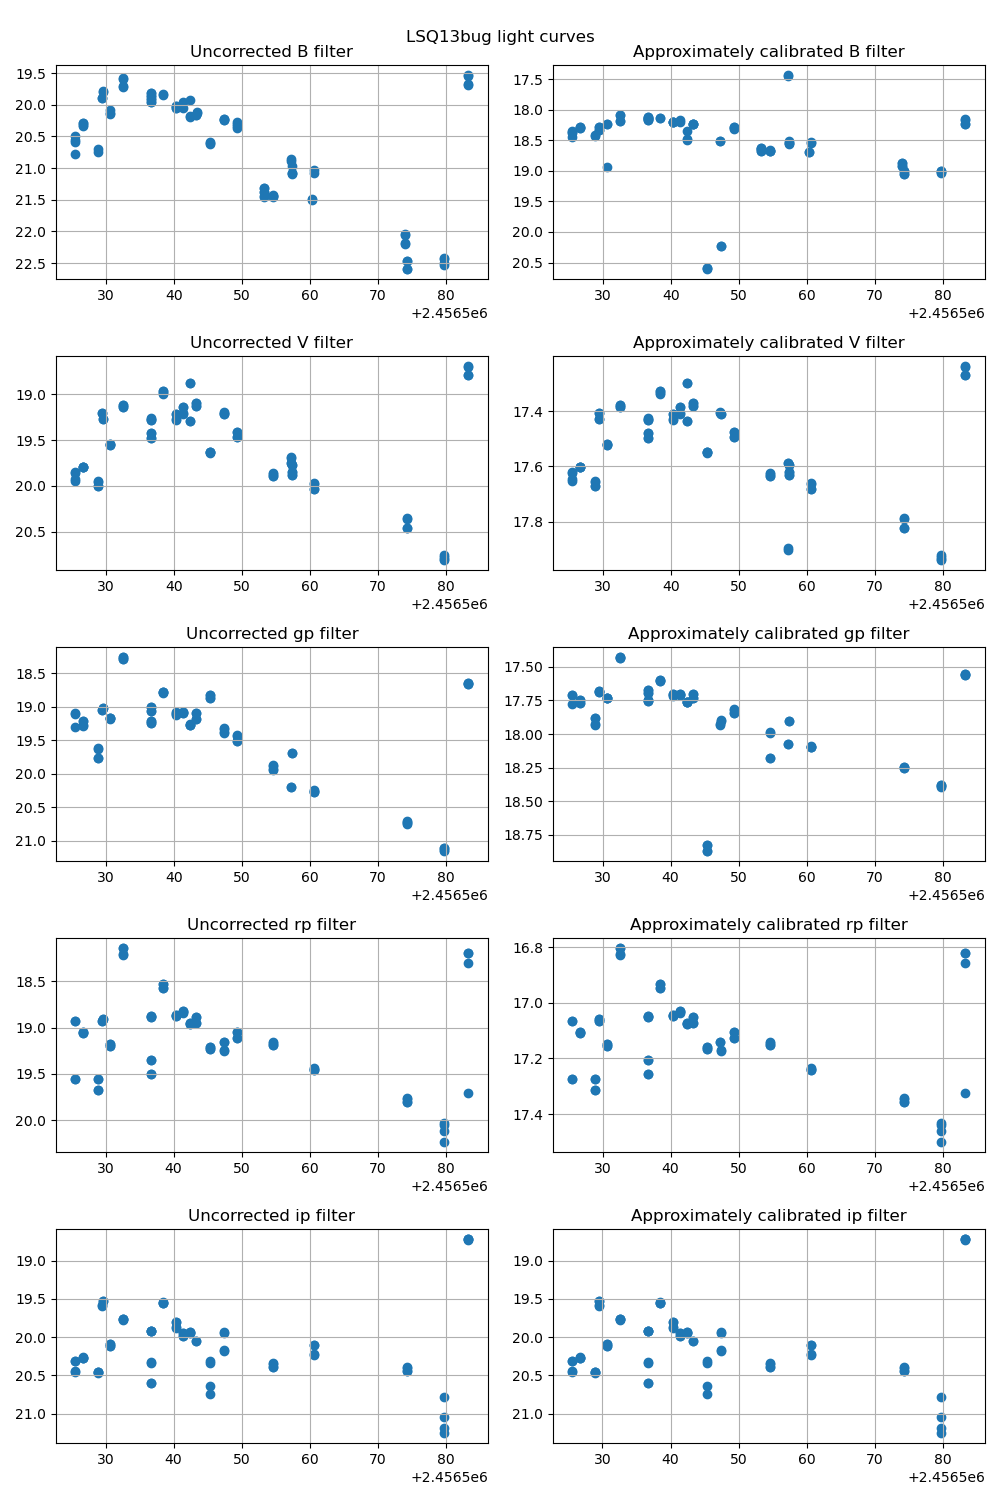

In [29]:
fig, ax = plt.subplots(5, 2)
fils = ['B', 'V', 'gp', 'rp', 'ip']
for i in range(5):
    filter = fils[i]
    section = corr_sn_curves[corr_sn_curves['filter'] == filter]
    x = section['MJD']
    y = section['mag']
    ycorr = section['corrected']
    ax[i, 0].scatter(x, y)
    ax[i, 0].set_title(f'Uncorrected {filter} filter')
    ax[i, 0].invert_yaxis()
    ax[i, 0].grid()
    ax[i, 1].scatter(x, ycorr)
    ax[i, 1].set_title(f'Approximately calibrated {filter} filter')
    ax[i, 1].invert_yaxis()
    ax[i, 1].grid()

fig.suptitle('LSQ13bug light curves')
fig.set_size_inches(10,15)
fig.tight_layout()
